In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
import scipy.io as sio

rho_ow = 1028
rho_ice = 917

paired = sns.color_palette("Paired", 10)

In [2]:
filename ='ANT/ANT_iceshelf_height_changes_RA_1994_2018_v0.h5'
is_H = h5py.File(filename,'r')

In [3]:
h_alt = np.array(is_H['/h_alt'])
h_firn = np.array(is_H['/h_firn'])

thickness = (h_alt - h_firn)*(1+rho_ice/(rho_ow - rho_ice))

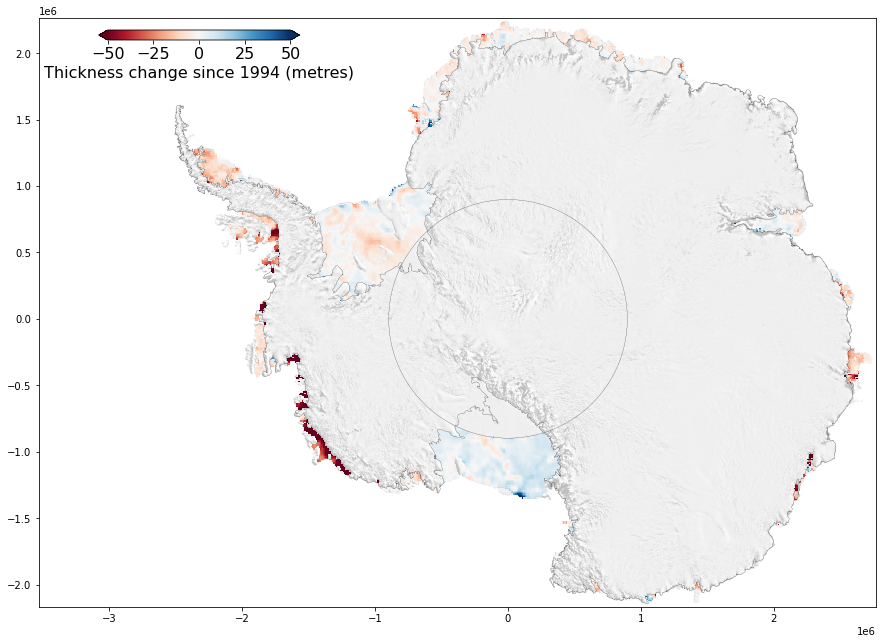

In [4]:
it_1 = 106

f = plt.figure()
f.set_size_inches(15,15)
plt.rc('axes', axisbelow=False)

plt.subplots_adjust(hspace=0)
plt.subplots_adjust(wspace=0)

moa = h5py.File('data/moa.h5','r')

ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)

extent = [np.min(moa['x']),np.max(moa['x']),np.min(moa['y']),np.max(moa['y'])]
im = ax1.imshow(np.squeeze(moa['RGB']),extent=extent)

extent = [np.min(is_H['x']),np.max(is_H['x']),np.min(is_H['y']),np.max(is_H['y'])]
im = ax1.imshow(np.flipud(thickness[it_1,:,:]),interpolation='none',vmin=-50, vmax=50, cmap='RdBu', extent=extent)

plt.plot(np.squeeze(moa['x_gl']),np.squeeze(moa['y_gl']),color='k',linewidth=0.2)
plt.plot(np.squeeze(moa['x_or']),np.squeeze(moa['y_or']),color='k',linewidth=0.2)

ax1.set_aspect('equal')
ax1.set_xlim(np.min(moa['x'])-1000000,np.max(moa['x']))
ax1.set_ylim(np.min(moa['y']),np.max(moa['y']))

cbaxes = inset_axes(ax1, width="30%", height="2%", loc='upper left',bbox_to_anchor=(190,330,670,500)) 
cbar = plt.colorbar(im,cax=cbaxes, ticks=[-50,-25,0,25,50], orientation='horizontal', extend='both')

cbar.ax.tick_params(labelsize=16)
cbar.set_label(label='Thickness change since 1994 (metres)',size=16)